# 기계학습 14주차 실습 자료
#### 조교 : 김도경

# 지난주 내용
1. fashion MNIST를 인식하는 프로그램
2. 깊은 다층 퍼셉트론 프로그래밍
    - 실험 결과
      - 98.1
      - 다층 퍼셉트론의 97.79%에 비해 0.31% 향상
3. 가중치 초기화 방법
4. 딥러닝의 학습 전략
    - 층이 깊어지면 현실적인 문제 발생
      - 그레이디언트 소멸 문제
      - 과잉 적합 문제
5. 그레이디언트 소멸 문제와 해결책
6. 과잉 적합과 과소 적합 회피 전략
7. 딥러닝의 과잉 적합 회피 전략
  - 데이터 양을 늘림
    - 데이터 양을 늘릴 수 없는 상황에서는 훈련 샘플을 변형하여 인위적으로 늘리는 
    - 데이터 증대(data augmentation) 사용
  - 규제 기법 적용
  - 데이터 증대, 가중치 감쇠, 드롭아웃, 앙상블 등

# 1. 손실 함수의 성능 비교 실험 
- 텐서플로는 30여종의 손실 함수 제공
- http://keras.io./losses

# 1-1. 평균제곱오차와 교차 엔트로피를 비교하는 프로그램 
- 공정한 비교를 위해 하이퍼 매개변수는 동일하게 설정 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion_mnist 읽어 와서 신경망에 입력할 형태로 변환 
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # float 32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
x_test=x_test.astype(np.float32)/255.0 # ndarray로 변환 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환 
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정 
n_input = 784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 평균제곱오차를 사용한 모델 
dmlp_mse = Sequential()
dmlp_mse.add(Dense(units = n_hidden1, activation='tanh', input_shape=(n_input,)))
dmlp_mse.add(Dense(units = n_hidden2, activation='tanh'))
dmlp_mse.add(Dense(units = n_hidden3, activation='tanh'))
dmlp_mse.add(Dense(units = n_hidden4, activation='tanh'))
dmlp_mse.add(Dense(units = n_output, activation='softmax'))
# 신경망 학습
dmlp_mse.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse = dmlp_mse.fit(x_train,y_train,batch_size = 128, epochs=30,validation_data = (x_test,y_test),verbose=2)


# 교차 엔트로피를 사용한 모델 
dmlp_ce = Sequential()
dmlp_ce.add(Dense(units = n_hidden1, activation='tanh', input_shape=(n_input,)))
dmlp_ce.add(Dense(units = n_hidden2, activation='tanh'))
dmlp_ce.add(Dense(units = n_hidden3, activation='tanh'))
dmlp_ce.add(Dense(units = n_hidden4, activation='tanh'))
dmlp_ce.add(Dense(units = n_output, activation='softmax'))
# 신경망 학습
dmlp_ce.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train,y_train,batch_size = 128, epochs=30,validation_data = (x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse = dmlp_mse.evaluate(x_test,y_test,verbose = 0)
print('mean_squared_error_accuracy = ',res_mse[1]*100)
res_ce = dmlp_ce.evaluate(x_test,y_test,verbose = 0)
print('crossentropy_accuracy = ',res_ce[1]*100)

Epoch 1/30
469/469 - 17s - loss: 0.0164 - accuracy: 0.8917 - val_loss: 0.0108 - val_accuracy: 0.9297
Epoch 2/30
469/469 - 17s - loss: 0.0097 - accuracy: 0.9369 - val_loss: 0.0086 - val_accuracy: 0.9433
Epoch 3/30
469/469 - 17s - loss: 0.0074 - accuracy: 0.9523 - val_loss: 0.0070 - val_accuracy: 0.9548
Epoch 4/30
469/469 - 17s - loss: 0.0059 - accuracy: 0.9628 - val_loss: 0.0060 - val_accuracy: 0.9607
Epoch 5/30
469/469 - 17s - loss: 0.0049 - accuracy: 0.9694 - val_loss: 0.0051 - val_accuracy: 0.9660
Epoch 6/30
469/469 - 17s - loss: 0.0042 - accuracy: 0.9744 - val_loss: 0.0048 - val_accuracy: 0.9681
Epoch 7/30
469/469 - 17s - loss: 0.0036 - accuracy: 0.9786 - val_loss: 0.0049 - val_accuracy: 0.9675
Epoch 8/30
469/469 - 17s - loss: 0.0031 - accuracy: 0.9819 - val_loss: 0.0045 - val_accuracy: 0.9715
Epoch 9/30
469/469 - 17s - loss: 0.0027 - accuracy: 0.9844 - val_loss: 0.0040 - val_accuracy: 0.9748
Epoch 10/30
469/469 - 17s - loss: 0.0024 - accuracy: 0.9862 - val_loss: 0.0036 - val_accura

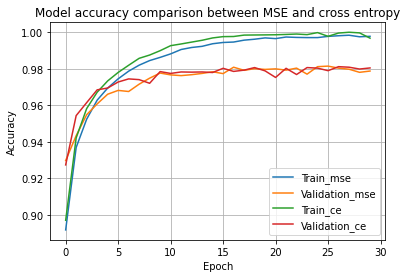

In [ ]:
import matplotlib.pyplot as plt

# accuracy 곡선 
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparison between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'],loc = 'best')
plt.grid()
plt.show()


# 2. 옵티마이저의 성능 비교 실험 
- 4가지 옵티마이저의 성능을 비교 
- 공정한 비교를 위해 모든 옵티마이저는 기본값 사용, batch_size와 eopchs은 같은 값 사용

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 - 13s - loss: 1.3497 - accuracy: 0.6223 - val_loss: 0.8358 - val_accuracy: 0.7180
Epoch 2/50
235/235 - 12s - loss: 0.7111 - accuracy: 0.7605 - val_loss: 0.6715 - val_accuracy: 0.7728
Epoch 3/50
235/235 - 12s - loss: 0.5967 - accuracy: 0.7994 - val_loss: 0.5764 - val_accuracy: 0.8068
Epoch 4/50
235/235 - 12s - loss: 0.5429 - accuracy: 0.8146 - val_loss: 0.5707 - val_accuracy: 0.7978
Epoch 5/50
235/235 - 12s - loss: 0.5101 - accuracy: 0.8240 - val_loss: 0.5183 - val_accuracy: 0.8184
Epoch 6/50
235/235 - 12s - loss: 0.4836 - accuracy: 0.8319 - val_loss: 0.5228 - val_accuracy: 0.8146
Epoch 7/50
235/235 - 12s - loss: 0.4664 - accuracy: 0.8378 - val_loss: 0.4926 - val_accuracy: 0.8285
Epoch 8/50
235/235 - 12s - loss: 0.4511 - accuracy: 0.8423 - val_loss: 0.4677 - val_accuracy: 0.8352
Epoch 9/50
235/235 - 12s - loss: 0.4399 - accuracy: 0.8457 - val_loss: 0.4696 - val_accuracy: 0.8355
Epoch 10/50
235/235 - 12s - 

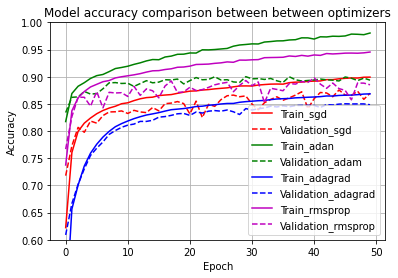

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion_mnist 읽어 와서 신경망에 입력할 형태로 변환 
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # float 32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
x_test=x_test.astype(np.float32)/255.0 # ndarray로 변환 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환 
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정 
n_input = 784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정 
bs = 256
n_epoch = 50


# 모델을 설계해주는 함수 (모델을 나타내는 객체 model을 반환)
def build_model():
  model = Sequential()
  model.add(Dense(units = n_hidden1, activation='relu', input_shape=(n_input,)))
  model.add(Dense(units = n_hidden2, activation='relu'))
  model.add(Dense(units = n_hidden3, activation='relu'))
  model.add(Dense(units = n_hidden4, activation='relu'))
  model.add(Dense(units = n_output, activation='softmax'))

  return model

# SGD 옵티마이저를 사용하는 모델 
dmlp_sgd = build_model()
dmlp_sgd.compile(loss='categorical_crossentropy',optimizer = SGD(),metrics=['accuracy'])
hist_sgd = dmlp_sgd.fit(x_train,y_train,batch_size = bs, epochs=n_epoch,validation_data = (x_test,y_test),verbose=2)

# Adam 옵티마이저를 사용하는 모델
dmlp_adam = build_model()
dmlp_adam.compile(loss='categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])
hist_adam = dmlp_adam.fit(x_train,y_train,batch_size = bs, epochs=n_epoch,validation_data = (x_test,y_test),verbose=2)

# Adagrad 옵티마이저를 사용하는 모델 
dmlp_adagrad = build_model()
dmlp_adagrad.compile(loss='categorical_crossentropy',optimizer = Adagrad(),metrics=['accuracy'])
hist_adagrad = dmlp_adagrad.fit(x_train,y_train,batch_size = bs, epochs=n_epoch,validation_data = (x_test,y_test),verbose=2)

# RMSprop 옵티마이저를 사용하는 모델
dmlp_rmsprop = build_model()
dmlp_rmsprop.compile(loss='categorical_crossentropy',optimizer = RMSprop(),metrics=['accuracy'])
hist_rmsprop = dmlp_rmsprop.fit(x_train,y_train,batch_size = bs, epochs=n_epoch,validation_data = (x_test,y_test),verbose=2)


# 네 모델의 정확률 비교
print('SGD_accuracy = ',dmlp_sgd.evaluate(x_test,y_test,verbose = 0)[1]*100)
print('Adam_accuracy = ',dmlp_adam.evaluate(x_test,y_test,verbose = 0)[1]*100)
print('Adagrad_accuracy = ',dmlp_adagrad.evaluate(x_test,y_test,verbose = 0)[1]*100)
print('RMSprop_accuracy = ',dmlp_rmsprop.evaluate(x_test,y_test,verbose = 0)[1]*100)


import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.plot(hist_sgd.history['accuracy'],'r')
plt.plot(hist_sgd.history['val_accuracy'],'r--')
plt.plot(hist_adam.history['accuracy'],'g')
plt.plot(hist_adam.history['val_accuracy'],'g--')
plt.plot(hist_adagrad.history['accuracy'],'b')
plt.plot(hist_adagrad.history['val_accuracy'],'b--')
plt.plot(hist_rmsprop.history['accuracy'],'m')
plt.plot(hist_rmsprop.history['val_accuracy'],'m--')
plt.title('Model accuracy comparison between between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_sgd','Validation_sgd','Train_adan','Validation_adam','Train_adagrad','Validation_adagrad','Train_rmsprop','Validation_rmsprop'],loc = 'best')
plt.grid()
plt.show()


# 3. 교차 검증을 이용한 하이퍼 파라미터 최적화 
- 교차 검증은 우연을 배제하는데 효과적 
- 교차 검증으로 성능 측정의 신뢰도 높임 
- 텐서플로우는 교차 검증을 지원하는 함수가 없어 직접 작성해야 한다 
  - cross_validation 함수 
  - k개로 분할하는 일은 sklearn의 KFold 함수 이용 


SGD_accuracy =  0.8708999991416931
Adam_accuracy =  0.8962999939918518
Adagrad_accuracy =  0.8573666572570801
RMSprop_accuracy =  0.889549994468689


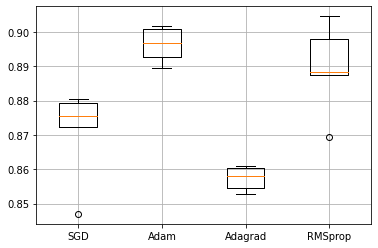

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# fashion_mnist 읽어 와서 신경망에 입력할 형태로 변환 
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # float 32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
x_test=x_test.astype(np.float32)/255.0 # ndarray로 변환 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환 
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정 
n_input = 784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

# 하이퍼 매개변수 설정 
bs = 256
n_epoch = 50
k = 5         # 5겹


# 모델을 설계해주는 함수 (모델을 나타내는 객체 model을 반환)
def build_model():
  model = Sequential()
  model = Sequential()
  model.add(Dense(units = n_hidden1, activation='relu', input_shape=(n_input,)))
  model.add(Dense(units = n_hidden2, activation='relu'))
  model.add(Dense(units = n_hidden3, activation='relu'))
  model.add(Dense(units = n_hidden4, activation='relu'))
  model.add(Dense(units = n_output, activation='softmax'))

  return model

# 교차 검증을 해주는 함수 (서로 다른 옵티마이저에 대한)
def cross_validation(opt):
  accuracy=[]
  for train_index, val_index in KFold(k).split(x_train):
    xtrain,xval = x_train[train_index],x_train[val_index]
    ytrain,yval = y_train[train_index],y_train[val_index]
    dmlp = build_model()
    dmlp.compile(loss='categorical_crossentropy',optimizer = opt,metrics=['accuracy'])
    dmlp.fit(xtrain,ytrain,batch_size = bs, epochs=n_epoch,verbose=0)
    accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
  return accuracy


# 옵티마이저 4개에 대해 교차 검증을 실행
acc_sgd = cross_validation(SGD())
acc_adam = cross_validation(Adam())
acc_adagrad = cross_validation(Adagrad())
acc_rmsprop = cross_validation(RMSprop())


# 네 모델의 정확률 비교
print('SGD_accuracy = ',np.array(acc_sgd).mean())
print('Adam_accuracy = ',np.array(acc_adam).mean())
print('Adagrad_accuracy = ',np.array(acc_adagrad).mean())
print('RMSprop_accuracy = ',np.array(acc_rmsprop).mean())


import matplotlib.pyplot as plt

# 네 모델의 정확률을 하나의 그래프에서 비교
plt.boxplot([acc_sgd, acc_adam, acc_adagrad, acc_rmsprop],labels = ['SGD','Adam','Adagrad','RMSprop'])
plt.grid()


# 4. 과다한 계산 시간과 해결책 

- 교차 검증은 많은 시간 소요
  - 교차 검증을 이용한 하이퍼 파라미터 최적화 계산 시간 분석
  - for문은 k번 반복. fit 함수는 가장 많은 시간 소요. fit가 소요하는 시간을 t라하면 k*t만큼 지나야 옵티마이저 하나 처리
  - 옵티마이저가 4개이므로 4kt 시간 소요(t=5분,k=5라면 4*5*5=100분 소요)
  - k=10으로 늘리고 n_epoch을 20에서 100으로 늘리면 1000분(약 16.6시간) 소요

- 실제에서는
  - 데이터 크기가 MNIST에 비해 수십~수백 배
  - 더 많은 하이퍼 매개변수를 동시에 최적화
  - 예를 들어, 옵티마이저 4개, 학습률 7개, 미니배치 크기 6개라면 총 168개의 조합

- 해결책
  - GPU 사용
  - 욕심을 버림(경험을 통해 조합의 수를 축소)
